## Exercício
Este arquivo contém um código completo para resolução de pórticos planos, partindo desde a definição da estrutura até o cálculo de esforços em cada elemento. Vale ressaltar que o código é genérico, podendo ser usado para calcular qualquer pórtico plano que se tenha interesse. Basta para isso alterar as informações de entrada, como coordenadas e propriedades de cada seção.

O processo inicia com a definição do número de nós, elementos e suas coordenadas, além da importação dos pacotes necessários para rodar o código em python:

In [77]:
import numpy as np
from pylab import *
import matplotlib.pyplot as plt

#Dados do problema "Pórticos: EXEMPLO 02" da lista

n_nos=3 #Número de nós
n_el=2 #Número de elementos
# número de cada nó e coordenadas x e y dos mesmos
no = [1,       2,       3       ]
x  = [0,       8,       13       ]
y  = [0,       0,       0       ]


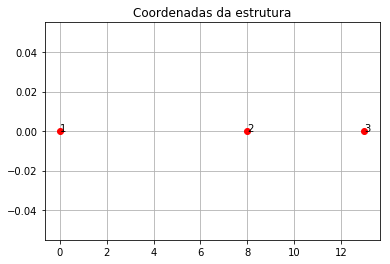

In [78]:
from IPython.display import display, Math, HTML

tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

#Código apenas para geração da imagem
fig = plt.figure()
ax = fig.add_subplot(111)

lines = plt.plot(x,y,'ro')
for i in no:
    plt.annotate(str(no[i-1]), xy=(x[i-1], y[i-1]), xytext=(x[i-1], y[i-1]))

title('Coordenadas da estrutura')
grid()

show()

O próximo passo é a definição da matriz de conectividade da estrutura, responsável pela definição dos elementos e suas propriedades. Essa matriz possui uma linha para cada elemento, sendo que cada coluna indica, respectivamente: número do elemento, número da seção transversal do mesmo (que define suas propriedades), primeiro nó e segundo nó do elemento. 

As propriedades são definidas por uma matriz, que possui uma linha para cada seção distinta na estrutura. A primeira coluna indica o número da seção, a segunda a área da seção transversal, a terceira o módulo de elasticidade, a quarta o momento de inércia e a quinta a distância vertical entre a extremidade e a linha neutra. Vale ressaltar que essas propriedades são necessárias para pórticos planos, porém para outros casos, como pórticos espaciais, outras propriedades adicionais podem ser necessárias.

In [79]:
# Matriz de conectividade: [elemento, Número da seção, primeiro nó, segundo nó]
conec = np.matrix([[1,   1,   0,   1],
                  [2,   1,   1,   2]])

n_sec=2 # Número de seções distintas presentes na estrutura
b1=.12 #Base 1
h1=.40 #Altura 1
b2=b1 #Base 2
h2=h1 #Altura 2

# Matriz de Seções: [número da seção, área, módulo de elasticidade, momento de inércia, 
# distância vertical à linha neutra]
secoes = np.matrix([[1, b1*h1, 50e9, b1*h1**3/12, h1/2],
                    [2, b2*h2, 50e9, b2*h2**3/12, h2/2]])

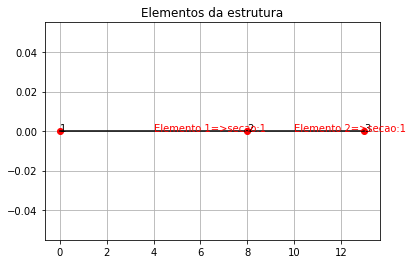

In [80]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

#Apenas para plotagem da figura
fig = plt.figure()
ax = fig.add_subplot(111)

lines = plt.plot(x,y,'ro')
for i in no:
    plt.annotate(str(no[i-1]), xy=(x[i-1], y[i-1]), xytext=(x[i-1], y[i-1]))

for i in range(n_el):
    plt.plot([x[conec[i,2]], x[conec[i,3]]],[y[conec[i,2]], y[conec[i,3]]],'k')
    plt.annotate('Elemento ' +str(i+1)+'=>secao:'+str(conec[i,1]), xy=((x[conec[i,2]]+x[conec[i,3]])/2, (y[conec[i,2]]+y[conec[i,3]])/2),
                 xytext=((x[conec[i,2]]+x[conec[i,3]])/2, (y[conec[i,2]]+y[conec[i,3]])/2),color='r')
title('Elementos da estrutura')
grid()

show()

O próximo passo é definir o carregamento. Esta definição se dá em duas etapas:

    1 - Carregamento nodal: aquele que ocorre diretamente em um nó da estrutura
    2 - Carregamento equivalente: carregamentos distribuídos ou concentrados em pontos diferentes dos nós

A seguir tem-se o caso das forças nodais, onde uma matriz é utilizada para definir as informações necessárias. Para cada nó em que ao menos uma força nodal atua tem-se uma linha nessa matriz. A primeira coluna refere-se ao nó carregado, a segunda ao carregamento na direção x, a terceira em y e a quarta ao momento. Vale a pena ressaltar que é possível que apenas uma força atue em um nó, o que é indicado pelo valor zero nas demais forças.

In [81]:
# Carregamentos nodais
n_forcas=0 #Número de nós na qual atuam forças
#Matriz de forças [nó (primeiro nó é o nó zero e não 1), força em x, força em y, momento]
forcas=np.matrix([])

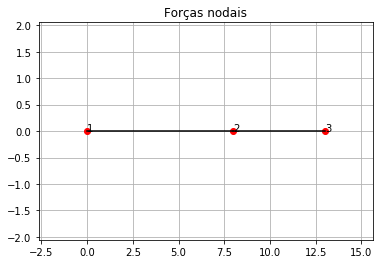

In [82]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

from pylab import *

#Apenas para plotagem da figura
fig = plt.figure()
ax = fig.add_subplot(111)

lines = plt.plot(x,y,'ro')
for i in no:
    plt.annotate(str(no[i-1]), xy=(x[i-1], y[i-1]), xytext=(x[i-1], y[i-1]))
l = max(abs(x[1]-x[0]),abs(y[1]-y[0]))
j = 0
if n_forcas != 0:
    for i in forcas[:,0]:
        if int(forcas[j,1]) != 0:
            arrow( x[int(i)]-np.sign(forcas[j,1])*0.25*l, y[int(i)],np.sign(forcas[j,1])*0.25*l,0,
                  length_includes_head = True, head_width = l*0.05 )
            plt.annotate('Fx='+str(forcas[j,1]), xy=(x[int(i)]-np.sign(forcas[j,1])*0.25*l, y[int(i)]),
                     xytext=(x[int(i)]-np.sign(forcas[j,1])*0.25*l, y[int(i)]),color='r')
        if int(forcas[j,2]) != 0:
            arrow( x[int(i)], y[int(i)]-np.sign(forcas[j,2])*0.25*l,0,np.sign(forcas[j,2])*0.25*l,
                  length_includes_head = True, head_width = l*0.05 )
            plt.annotate('Fy='+str(forcas[j,2]), xy=(x[int(i)], y[int(i)]-np.sign(forcas[j,2])*0.25*l),
                     xytext=(x[int(i)], y[int(i)]-np.sign(forcas[j,2])*0.25*l),color='r')
        if int(forcas[j,3]) != 0:
            circle1 = plt.Circle((x[int(i)], y[int(i)]), 0.1*l, color='r', fill=False)
            ax.add_artist(circle1)
            plt.annotate('Mz='+str(forcas[j,3]), xy=(x[int(i)]-np.sign(forcas[j,3])*0.125*l, 
                    y[int(i)]-np.sign(forcas[j,3])*0.125*l),xytext=(x[int(i)]-np.sign(forcas[j,3])*0.125*l, 
                    y[int(i)]-np.sign(forcas[j,3])*0.125*l),color='r')


        j = j+1

for i in range(n_el):
    plt.plot([x[conec[i,2]], x[conec[i,3]]],[y[conec[i,2]], y[conec[i,3]]],'k')    

left, right = xlim()
lower, upper = ylim()
xlim((left-0.25*l,right+0.25*l))
ylim((lower-0.25*l,upper+0.25*l))
title(u"Forças nodais")
grid()

show()

Já para as forças equivalentes, é preciso ter claro quais os casos que serão adotados. Aqui dois tipos de carregamentos são levados em consideração: carregamento uniformemente distribuído e força concentrada entre nós, ambos perpendiculares ao elemento.

Novamente, uma matriz é utilizada para definir os carregamentos equivalentes. Para cada carregamento corresponde uma linha na matriz, sendo as colunas usadas para informar o elemento carregado, o tipo de carregamento equivalente, a intensidade e a posição (para o caso de carregamento concentrado entre nós), respectivamente. Como já comentado, dois tipos são considerados aqui. O tipo 1 refere-se ao carregamento distribuído, enquanto o tipo 2 dis respeito à força concentrada entre nós.

In [83]:
# Carregamentos equivalentes
n_eq=2 # número de elementos que contem carregamentos equivalentes
# Matriz de carregamento equivalente = [elemento (primeiro elemento é o elemento zero e não 1),
# tipo de carregamento, intensidade, posição (para o caso de carregamento concentrado entre nós)]
w_eq=np.matrix([[0, 1, -2e3, 0],
                [1, 2, -20e3, 2]])


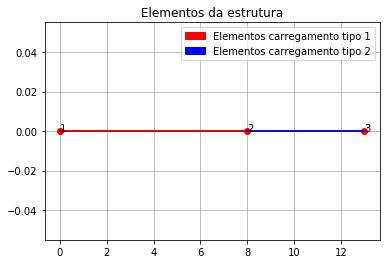

In [84]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

#Apenas para plotagem da figura
import matplotlib.patches as mpatches

fig = plt.figure()
ax = fig.add_subplot(111)

lines = plt.plot(x,y,'ro')
for i in no:
    plt.annotate(str(no[i-1]), xy=(x[i-1], y[i-1]), xytext=(x[i-1], y[i-1]))
for i in range(n_el):
    plt.plot([x[conec[i,2]], x[conec[i,3]]],[y[conec[i,2]], y[conec[i,3]]],'k')
    
if n_eq != 0:
    j = 0
    for i in w_eq[:,0]:
        if w_eq[j,1]==1:
            fig1 = plt.plot([x[conec[int(i),2]], x[conec[int(i),3]]],[y[conec[int(i),2]], y[conec[int(i),3]]],'r')
        elif w_eq[j,1]==2:
            fig2 = plt.plot([x[conec[int(i),2]], x[conec[int(i),3]]],[y[conec[int(i),2]], y[conec[int(i),3]]],'b')
        j = j + 1

red_patch = mpatches.Patch(color='red', label=u'Elementos carregamento tipo 1')
blue_patch = mpatches.Patch(color='blue', label=u'Elementos carregamento tipo 2')
plt.legend(handles=[red_patch,blue_patch])


    
title(u'Elementos da estrutura')
grid()

show()

Por fim, resta definir as condições de contorno do problema. Para isso, uma matriz com número de linhas igual ao número de nós com restrição deve ser informada. Já para as colunas, a primeira indica o número do nó restringido e as três colunas seguintes referem-se aos graus de liberdade x, y e rotação desse nó, respectivamente. Caso apresente valor 1, isso indica que o respectivo GDL desse nó está restringido, caso seja zero, o GDL está liberado. Vale ressaltar que caso um nó não apresente restrições, ele não deve ser incluído na matriz.

In [85]:
# Apoios
n_rest=3  #número de nós restringidos
#Matriz de condições de contorno 
# [número do nó (primeiro nó é o nó zero e não 1), 
# restringido_x, restringido_y, restringido_theta] (1 para restringido, e 0 para livre)
GDL_rest=np.matrix([[0, 0, 1, 0],
                    [1, 0, 1, 0],
                    [2, 1, 1, 1]])  


Essa matriz de condições de contorno indica que os seguintes nós e graus de liberdade estão restringidos: 

In [86]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

txt = r'\begin{align*}'
j = 0
for i in GDL_rest[:,0]:
    txt = txt + 'No' + str(GDL_rest[j,0]+1) + ':'
    if GDL_rest[j,1] == 1:
        txt = txt+' x=fixo,'
    if GDL_rest[j,2] == 1:
        txt = txt+' y=fixo,'
    if GDL_rest[j,3] == 1:
        txt = txt+' rotacao=fixo,'
    txt = txt+'\\\\'
    j = j + 1
txt = txt + '\end{align*}'
display(Math(txt))

<IPython.core.display.Math object>

# Cálculo da estrutura

Todas as informações necessárias para definição da estrutura já foram passadas. Assim, as próximas linhas de código são independentes do problema em questão.

O cálculo da estrutura inicia pela matriz de rigidez da mesma, considerando a contribuição de um elemento por vez, conforme trecho de código a seguir:

In [87]:
# CALCULO DA ESTRUTURA
GDL=3*n_nos  #graus de liberdade da estrutura
K=np.zeros((GDL,GDL)) #matriz rigidez global

# Cálculo da matriz de cada elemento
for el in range(n_el):
    #calculo do comprimento do elemento el
    no1=conec[el,2]
    no2=conec[el,3]
    #L=abs(x(no2)-x(no1))
    L = np.sqrt((x[no2] - x[no1])**2 + (y[no2] - y[no1])**2)
    #Propriedades
    A = secoes[conec[el,1],1]
    E = secoes[conec[el,1],2]
    Iz = secoes[conec[el,1],3]
    #Cossenos diretores a partir das coordenadas dos ns do elemento
    c = (x[no2] - x[no1])/L	# cosseno
    s = (y[no2] - y[no1])/L	#  seno
    # Matriz de transformação do elemento "el"
    T=np.matrix([[c, s, 0, 0, 0, 0],
                [-s, c, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 0],
                [0, 0, 0, c, s, 0],
                [0, 0, 0,-s, c, 0],
                [0, 0, 0, 0, 0, 1]])
    # Construo da matriz de rigidez em coordenadas locais
    k1=E*A/L
    k2=12*E*Iz/L**3
    k3=6*E*Iz/L**2
    k4=4*E*Iz/L
    k5=k4/2
    k=np.array([[k1, 0, 0, -k1, 0, 0],
                [0, k2, k3, 0, -k2, k3],
                [0, k3, k4, 0, -k3, k5],
                [-k1, 0, 0,    k1, 0, 0],
                [0, -k2, -k3, 0, k2, -k3],
                [0, k3, k5, 0, -k3, k4]])
    # Matriz de rigidez em coordenadas globais  
    kg=np.dot(np.matrix.transpose(T),np.dot(k,T))
  
    #Determinando matriz de incidência cinemática:
    b = np.zeros((6,GDL))
    i=no1
    j=no2
    b[0,3*i] = 1
    b[1,3*i+1] = 1
    b[2,3*i+2] = 1
    b[3,3*j] = 1
    b[4,3*j+1] = 1
    b[5,3*j+2] = 1
    #Expandindo e convertendo a matriz do elemento para coordenadas globais:
    Ki=np.dot(np.matrix.transpose(b),np.dot(kg,b))
    #Somando contribuição do elemento para a matriz de rigidez global:
    K = K + Ki

A matriz de rigidez da estrutura $(\textbf{K})$ é então:

In [88]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

txt = r'\begin{align*}\begin{bmatrix}'
for j in range(GDL):
    for i in range(GDL-1):
        txt+=str(np.round(K[j,i],2))+'&'
    
    txt+= str(np.round(K[j,GDL-1],2)) + '\\\\'
txt+= '\end{bmatrix}\end{align*}'
display(Math(txt))

<IPython.core.display.Math object>

A seguir tem-se o cálculo do vetor de forças:

In [89]:
# Vetor de foras Global
F=np.zeros((GDL,1))
for i in range(n_forcas):
    F[int(3*forcas[i,0])]=forcas[i,1]
    F[int(3*forcas[i,0])+1]=forcas[i,2]
    F[int(3*forcas[i,0])+2]=forcas[i,3]


In [90]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

txt = r'\begin{align*}\quad\boldsymbol F=\begin{bmatrix}'
for j in range(GDL):    
    txt+= str(np.round(F[j,0],2)) + '\\\\'
txt+= '\end{bmatrix}\end{align*}'
display(Math(txt))

<IPython.core.display.Math object>

Agora é necessário calcular o vetor de forças equivalentes, considerando a contribuição de um carregamento equivalente por vez:

In [91]:
# Construção do vetor de foras equivalentes
Feq=np.zeros((GDL,1))
for i in range(n_eq):
    tipo=int(w_eq[i,1])   #tipo de força equivalente
    el=int(w_eq[i,0])     #elemento onde está aplicada
    if tipo==1: #Carregamento distribuído
        f=np.zeros((6,1))
        no1=conec[el,2]
        no2=conec[el,3]
        L = np.sqrt((x[no2] - x[no1])**2 + (y[no2] - y[no1])**2)
        w=w_eq[i,2]
        f[0]=0
        f[1]=+w*L/2
        f[2]=+w*L**2/12
        f[3]=0
        f[4]=+w*L/2
        f[5]=-w*L**2/12
        #Cossenos diretores a partir das coordenadas dos ns do elemento
        c = (x[no2] - x[no1])/L	# cosseno
        s = (y[no2] - y[no1])/L	#  seno
        # Matriz de transformação do elemento "el"
        T=np.matrix([[c, s, 0, 0, 0, 0],
                    [-s, c, 0, 0, 0, 0],
                    [0, 0, 1, 0, 0, 0],
                    [0, 0, 0, c, s, 0],
                    [0, 0, 0,-s, c, 0],
                    [0, 0, 0, 0, 0, 1]])
        feq=np.dot(np.matrix.transpose(T),f)
        Feq[3*no1]=Feq[3*no1]+feq[0]
        Feq[3*no1+1]=Feq[3*no1+1]+feq[1]
        Feq[3*no1+2]=Feq[3*no1+2]+feq[2]
        Feq[3*no2]=Feq[3*no2]+feq[3]
        Feq[3*no2+1]=Feq[3*no2+1]+feq[4]
        Feq[3*no2+2]=Feq[3*no2+2]+feq[5]
    elif tipo==2: ## carga aplicada a uma distancia a do nó i
        f=np.zeros((6,1))
        no1=conec[el,2]
        no2=conec[el,3]
        L = np.sqrt((x[no2] - x[no1])**2 + (y[no2] - y[no1])**2)
        a=w_eq[i,3]
        b=L-a
        p=w_eq[i,2]
        f[0]=0
        f[1]=+p*b**2*(3*a+b)/L**3
        f[2]=+p*a*b**2/L**2
        f[3]=0
        f[4]=+p*a**2*(a+3*b)/L**3
        f[5]=-p*a**2*b/L**2
        #Cossenos diretores a partir das coordenadas dos nós do elemento
        c = (x[no2] - x[no1])/L # cosseno
        s = (y[no2] - y[no1])/L #  seno
        # Matriz de transformação do elemento "el"
        T=np.matrix([[c, s, 0, 0, 0, 0],
                    [-s, c, 0, 0, 0, 0],
                    [0, 0, 1, 0, 0, 0],
                    [0, 0, 0, c, s, 0],
                    [0, 0, 0,-s, c, 0],
                    [0, 0, 0, 0, 0, 1]])
        feq=np.dot(np.matrix.transpose(T),f)
        Feq[3*no1]=Feq[3*no1]+feq[0]
        Feq[3*no1+1]=Feq[3*no1+1]+feq[1]
        Feq[3*no1+2]=Feq[3*no1+2]+feq[2]
        Feq[3*no2]=Feq[3*no2]+feq[3]
        Feq[3*no2+1]=Feq[3*no2+1]+feq[4]
        Feq[3*no2+2]=Feq[3*no2+2]+feq[5]


In [92]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

txt = r'\begin{align*}\quad\boldsymbol F_{eq}=\begin{bmatrix}'
for j in range(GDL):    
    txt+= str(np.round(Feq[j,0],2)) + '\\\\'
txt+= '\end{bmatrix}\end{align*}'
display(Math(txt))

<IPython.core.display.Math object>

Tem-se calculados até aqui a matriz de rigidez $(\textbf{K})$, o vetor de forças nodais $(\textbf{F})$ e o vetor de forças equivalentes $(\textbf{F}_{eq})$. O próximo passo é aplicar as condições de contorno ao problema, de modo a possibilitar a obtenção de uma solução para o mesmo. Para isso, elimina-se as linhas de $\textbf{K}$, $\textbf{F}$ e $\textbf{F}_{eq}$ e colunas de $\textbf{K}$ referentes aos GDL restringidos. 

Uma maneira computacionalmente simples e eficiente de se fazer isso é zerar os termos das linhas e colunas que seriam eliminadas de $\textbf{K}$, $\textbf{F}$ e $\textbf{F}_{eq}$ e atribuir o valor 1 aos termos da diagonal da matriz $\textbf{K}$ que seriam eliminados. O trecho de código a seguir refere-se a esse passo:

In [93]:
# guardamos os originais de K e F
Kg=np.copy(K)
Kg[:] = K[:]
Fg=F+Feq
# Aplicar Restrições (condições de contorno)
for k in range(n_rest):
    # Verifica se há restrição na direção x
    if GDL_rest[k,1]==1:
        j=3*GDL_rest[k,0]
        #Modificar Matriz de Rigidez
        for i in range(GDL):
            Kg[j,i]=0   #zera linha
            Kg[i,j]=0   #zera coluna
        Kg[j,j]=1       #valor unitário na diagonal principal
        Fg[j]=0
    # Verifica se há restrição na direção y
    if GDL_rest[k,2]==1:
        j=3*GDL_rest[k,0]+1
        #Modificar Matriz de Rigidez
        for i in range(GDL):
            Kg[j,i]=0   #zera linha
            Kg[i,j]=0   #zera coluna
        Kg[j,j]=1       #valor unitário na diagonal principal
        Fg[j]=0
    # Verifica se há restrição na rotação
    if GDL_rest[k,3]==1:
        j=3*GDL_rest[k,0]+2
        #Modificar Matriz de Rigidez
        for i in range(GDL):
            Kg[j,i]=0   #zera linha
            Kg[i,j]=0   #zera coluna
        Kg[j,j]=1       #valor unitário na diagonal principal
        Fg[j]=0


Para ilustrar esse processo, a matriz de rigidez restringida da estrutura resulta em:

In [94]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

txt = r'\begin{align*}\begin{bmatrix}'
for j in range(GDL):
    for i in range(GDL-1):
        txt+=str(np.round(Kg[j,i],2))+'&'
    
    txt+= str(np.round(Kg[j,GDL-1],2)) + '\\\\'
txt+= '\end{bmatrix}\end{align*}'
display(Math(txt))

<IPython.core.display.Math object>

Após a aplicação das condições de contorno, pode-se obter os deslocamentos nos nós da estrutura resolvendo o sistema de equações lineares $\textbf{K}\textbf{d}=\textbf{F}+\textbf{F}_{eq}$:

In [95]:
# Calculo dos deslocamentos
desloc=np.linalg.solve(Kg,Fg)    

In [96]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)
from decimal import Decimal

txt = r'\begin{align*}\quad\boldsymbol d=\begin{bmatrix}'
for j in range(GDL):
    if desloc[j,0] == 0:
        txt+= str(desloc[j,0]) + '\\\\'
    else:    
        txt+= str("{:.2E}".format(Decimal(desloc[j,0]))) + '\\\\'
txt+= '\end{bmatrix}\end{align*}'
display(Math(txt))

<IPython.core.display.Math object>

Tendo calculado os deslocamentos, pode-se agora obter as reações $(\textbf{R})$ usando a expressão $\textbf{R} = \textbf{K}\textbf{d}-\textbf{F}_{eq}$:

In [97]:
# Reações
reacoes=K*desloc-Feq

In [98]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)
from decimal import Decimal

txt = r'\begin{align*}\quad\boldsymbol R=\begin{bmatrix}'
for j in range(GDL):
    if reacoes[j,0] == 0:
        txt+= str(reacoes[j,0]) + '\\\\'
    else:    
        txt+= str("{:.2E}".format(Decimal(reacoes[j,0]))) + '\\\\'
txt+= '\end{bmatrix}\end{align*}'
display(Math(txt))

<IPython.core.display.Math object>

Por fim, resta determinar quais os esforços $(f)$ e tensões máximas $(\sigma)$ atuando em cada elemento:

In [99]:
# Esforços nos elementos
f_el=np.zeros((n_el,6))
N = np.zeros((n_el,1))
Mmax = np.zeros((n_el,1))
Smax = np.zeros((n_el,1))
for el in range(n_el):
    #calculo do comprimento do elemento el
    no1=conec[el,2]
    no2=conec[el,3]
    #L=abs(x(no2)-x(no1))
    L = np.sqrt((x[no2] - x[no1])**2 + (y[no2] - y[no1])**2)
    #Propriedades
    A = secoes[conec[el,1],1]
    E = secoes[conec[el,1],2]
    Iz = secoes[conec[el,1],3]
    cc = secoes[conec[el,1],4]
    #Cossenos diretores a partir das coordenadas dos ns do elemento
    c = (x[no2] - x[no1])/L # cosseno
    s = (y[no2] - y[no1])/L #  seno
    # Matriz de transformação do elemento "el"
    T=np.matrix([[c, s, 0, 0, 0, 0],
                [-s, c, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 0],
                [0, 0, 0, c, s, 0],
                [0, 0, 0,-s, c, 0],
                [0, 0, 0, 0, 0, 1]])
    # Construção da matriz de rigidez em coordenadas locais
    k1=E*A/L
    k2=12*E*Iz/L**3
    k3=6*E*Iz/L**2
    k4=4*E*Iz/L
    k5=k4/2
    ke=np.array([[k1, 0, 0, -k1, 0, 0],
                [0, k2, k3, 0, -k2, k3],
                [0, k3, k4, 0, -k3, k5],
                [-k1, 0, 0,    k1, 0, 0],
                [0, -k2, -k3, 0, k2, -k3],
                [0, k3, k5, 0, -k3, k4]])
   #pega os valores dos deslocamentos dos nós do elemento "el"
    u1 = desloc[no1*3]
    u2 = desloc[no2*3]
    v1 = desloc[no1*3+1]
    v2 = desloc[no2*3+1]
    th1=desloc[no1*3+2]
    th2=desloc[no2*3+2]
    d_g=np.matrix([u1, v1, th1, u2, v2, th2])
    d_el=T*d_g    

    ## forças equivalentes: recalcula vetor de feq. no sistema local
    aux = []
    cont = [0];
    for temp in w_eq[:,0]:
        if int(temp) ==el:
            aux = cont[:]
        cont[0] = cont[0] + 1
    if len(aux)==0:
        feqq=0
    else:
        aux = int(aux[0])
        tipo=w_eq[aux,1]   #tipo de força equivalente
        if tipo==1:
            w=w_eq[aux,2]
            feqq=np.zeros((6,1))
            feqq[0]=0
            feqq[1]=+w*L/2
            feqq[2]=+w*L**2/12
            feqq[3]=0
            feqq[4]=+w*L/2
            feqq[5]=-w*L**2/12
        elif tipo==2:
            a=w_eq[aux,3]
            b=L-a
            p=w_eq[aux,2]
            feqq=np.zeros((6,1))
            feqq[0]=0
            feqq[1]=+p*b**2*(3*a+b)/L**3
            feqq[2]=+p*a*b**2/L**2
            feqq[3]=0
            feqq[4]=+p*a**2*(a+3*b)/L**3
            feqq[5]=-p*a**2*b/L**2
        
    ## força e tensão atuante no elemento "el", cada linha da matriz f_el
    #contem os esforços de um elemento = [Fx_1 Fy_1 Mz_1 Fx_2 Fy_2 Mz_2]
    f_el[el,:] = np.matrix.transpose(ke*d_el-feqq)
    # Esforços para cálculo de tensão
    N[el,0]= abs(f_el[el,0])
    Mz1=abs(f_el[el,2])
    Mz2=abs(f_el[el,5])
    Mmax[el,0] = max(Mz1, Mz2)
    
    # momento máximo se for viga
    if el == 2:  #modificar esse condicional para o Trabalho
        Mzmeio = abs(  0  )  # Colocar no lugar do zero equação pertinente
        Mmax[el,0] = max(Mz1, Mz2, Mzmeio)

    # Cálculo da tensão
    Smax[el,0] = N[el,0]/A + Mmax[el,0]/Iz*cc

In [100]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)
from decimal import Decimal

txt = r'\begin{align*} f = \begin{bmatrix}'
for j in range(n_el):
    for i in range(5):
        if f_el[j,i] == 0:
            txt+= str(f_el[j,i]) + '&'
        else:    
            txt+= str("{:.2E}".format(Decimal(f_el[j,i]))) + '&'    
    if f_el[j,i] == 0:
        txt+= str(f_el[j,5]) + '\\\\'
    else:    
        txt+= str("{:.2E}".format(Decimal(f_el[j,5]))) + '\\\\'    
txt+= '\end{bmatrix}\end{align*}'
display(Math(txt))

txt = r'\begin{align*} \sigma = \begin{bmatrix}'
for j in range(n_el):
    if Smax[j,0] == 0:
        txt+= str(Smax[j,0]) + '\\\\'
    else:    
        txt+= str("{:.2E}".format(Decimal(Smax[j,0]))) + '\\\\'    
txt+= '\end{bmatrix}\end{align*}'
display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>